#### 데이터 로드 및 살펴보기

In [1]:
import pandas as pd

In [2]:
# 고객 정보 로드
# 고객 정보 컬럼 : 아이디, 나이, 성별, 직업, 주소(우편번호)
cols = ['uid', 'age', 'sex', 'job', 'zip_code']
users = pd.read_csv('./ml-100k/u.user', sep='|', names = cols)
users.shape

(943, 5)

In [5]:
users.head()

,uid,age,sex,job,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
# 영화 정보 로드
# 영화 정보 컬럼 : 영화 ID, 제목, 개봉일, 비디오개봉일, imdb 주소
m_cols = ['mid', 'title', 'release_date', 'video_release_date', 'imdb_url']
# 실제 데이터에 컬럼이 더 많으므로, 앞에서부터 잘라서 적용 → usecols
movies = pd.read_csv('./ml-100k/u.item', sep = '|', names = m_cols,
                        encoding = 'latin1', usecols = range(5))
movies.shape

(1682, 5)

In [4]:
movies.isna().sum()

mid                      0
title                    0
release_date             1
video_release_date    1682
imdb_url                 3
dtype: int64

In [6]:
movies.head()

,mid,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [7]:
# 평점 정보 로드
ratings_cols = ['uid', 'mid', 'rating', 'unix_timestamp']
ratings = pd.read_csv('./ml-100k/u.data', sep = '\t', names = ratings_cols)
ratings.shape

(100000, 4)

In [13]:
# unix_timestamp 칼럼의 데이터를 
# 우리가 알 수 있는 형태로 변경
# YYYY-mm-dd hh:mm:ss
# date 칼럼 생성
ratings['date'] = pd.to_datetime(ratings['unix_timestamp'], unit = 's')

In [14]:
ratings.head()

,uid,mid,rating,unix_timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16


#### 데이터 준비/시각화/통찰

In [15]:
# movies, users, ratings 정보 병합
# movies, ratings 병합 → movies_ratings
# mid 기준
movies_ratings = pd.merge(movies, ratings)
movies_ratings.head()

,mid,title,release_date,video_release_date,imdb_url,uid,rating,unix_timestamp,date
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088,1997-09-27 04:21:28
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411,1997-10-16 16:30:11
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426,1998-04-04 14:33:46
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324,1997-12-31 20:48:44


In [16]:
movies_ratings.shape

(100000, 9)

In [17]:
# uid 기준
movie_lens = pd.merge(movies_ratings, users)
movie_lens.head()

,mid,title,release_date,video_release_date,imdb_url,uid,rating,unix_timestamp,date,age,sex,job,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,1998-02-17 17:51:30,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,1998-02-17 18:20:08,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,1998-02-17 18:07:27,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,1998-02-17 17:31:36,60,M,retired,95076


In [18]:
movie_lens.shape

(100000, 13)

In [21]:
# 평가를 가장 많이 받은 작품 상위 10개
# value_counts()
movie_lens['title'].value_counts()[:10]

# 인기가 아주 없는 영화는 제외하고(평점 특정 개수 이하는 제외)
# 보여지는 데이터를 보면, 영화가 오래 될수록 평가를 많이 받는 경향

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64

In [22]:
movie_lens['title'].value_counts()[-10:]

Brothers in Trouble (1995)                    1
Death in Brunswick (1991)                     1
Leopard Son, The (1996)                       1
Lashou shentan (1992)                         1
Very Natural Thing, A (1974)                  1
Coldblooded (1995)                            1
Reluctant Debutante, The (1958)               1
Nemesis 2: Nebula (1995)                      1
Daens (1992)                                  1
Nobody Loves Me (Keiner liebt mich) (1994)    1
Name: title, dtype: int64

In [24]:
# 제목을 기준으로 데이터를 나눈다
# 평가 개수, 평점 평균
# 인덱스에 title, 컬럼에 평가 개수 size, 평점 평균 mean
import numpy as np
pd.pivot_table(movie_lens, index = 'title', 
               values = 'rating', aggfunc = [np.size, np.mean]).head()

,size,mean
,rating,rating
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390


In [26]:
# 피벗 없이 수행
# rating : 1차 레벨 컬럼
# np.size, np.mean : 2차 레벨 컬럼
movie_state = movie_lens.groupby('title').agg({ 'rating' : [np.size, np.mean] })
movie_state.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [ ]:
# 평점을 받은 개수가 1개인 영화, 즉 소수의 평가를 받은 영화가 많다
# → 노이즈가 개입되기 쉽다
# 일정 횟수 이상인 경우, 여기서는 100건 기준만 대상으로 처리하겠다

In [29]:
# 평가의 개수가 100개 이상인 데이터만 대상으로 
# 평균 평점 상위 5개
tmp = movie_state[movie_state['rating']['size'] >= 100].sort_values(by = [('rating', 'mean')],
                                                             ascending = False)
tmp.head()

rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230

In [30]:
tmp.shape

(338, 2)

In [31]:
# 간단한 시각화
from matplotlib import pyplot as plt
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


In [36]:
# 사용자별 평점을 내린 개수
movie_lens.groupby('uid').size()[:10]

uid
1     272
2      62
3      54
4      24
5     175
6     211
7     403
8      59
9      22
10    184
dtype: int64

In [38]:
movie_lens.groupby('uid').size().sort_values(ascending = False)[:10]

uid
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
dtype: int64

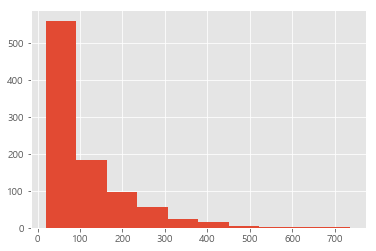

In [40]:
# 히스토그램
# 영화별 평점 개수 : x축
# 사용자별 평가 횟수 : y축
plt.style.use('ggplot')
movie_lens.groupby('uid').size().sort_values(ascending = False).hist()
# 빈도가 낮아지는 그래프 모양 → 길게 꼬리를 늘어뜨리는 모양 => 롱테일분포
# '지프의 법칙'을 따르는 굴곡 모양
# 자연어 말뭉치 표현에 나타나는 단어들을 그 사용 빈도가 높은 순으로 나열하면
# 모든 단어의 사용 빈도는 해당 단어의 빈도 순위에 반비례한다
# 영화의 평가가 많으면, 그 사용자들 중에는 1회성 평가 횟수도 많다

In [42]:
# 사용자별 평가 횟수, 평균
user_state = movie_lens.groupby('uid').agg({'rating' : [np.size, np.mean]})
user_state.head()

rating          
      size      mean
uid                 
1      272  3.610294
2       62  3.709677
3       54  2.796296
4       24  4.333333
5      175  2.874286

In [43]:
user_state.shape

(943, 2)

In [44]:
user_state['rating'].describe()
# 평균값 데이터를 보면
# 최저 1.49점, 최대 4.87점, 25~75% 지점은 모두 다 3점대
# → 일반적으로(평균적으로) 3.59 정도는 받는다
# → 최대 점수와 최저 점수는 편중된 것으로 보인다

,size,mean
count,943.000000,943.000000
mean,106.044539,3.588191
std,100.931743,0.445233
min,20.000000,1.491954
25%,33.000000,3.323054
50%,65.000000,3.620690
75%,148.000000,3.869565
max,737.000000,4.869565


#### 인수분해 머신을 이용한 추천 시스템 구성

- 행렬 인수분해라는 기능을 일반화한 알고리즘 → 차원축소 기법
- 희소 행렬을 다룰 수 있는 알고리즘
- 특징끼리 영향을 주고 받는 상호작용 개념을 계산에 적용 가능
- 범주형 변수를 더미 변수(파생 변수)로 변환하여 범주 간 상호작용성도 계산 가능
- 알고리즘은 회귀, 분류, 학습 등도 가능
- C++로 만들어진 libFM 알고리즘이 가장 유명 → 파이썬으로 구성된 fastFM

###### fastFM 제공 알고리즘
- ALS : 교대 최소 제곱법
 > 장점 : 예측 시간 빠르다, SGD보다 하이퍼파라미터가 적다  
 > 단점 : 규제 필수
- SGD : 확률 경사하강법
 > 장점 : 예측 시간 빠르다, 대규모 데이터(빅데이터)를 빠르게 학습할 수 있다  
 > 단점 : 규제 필수, SGD보다 하이퍼파라미터가 많다
- MCMC : 마르코프 연쇄 몬테카를로
 > 장점 : 하이퍼파라미터가 작다  
 > 단점 : 학습시간이 다소 느리다

### 도커 도입

- 사용하고자 하는 오픈소스 알고리즘(모듈) 중에는 윈도우에서 수행이 불가능한 경우가 많다
- 도커를 이용하여 리눅스 생태계를 만들고, 거기서 fastFM 설치 후 주피터 연결

In [ ]:
# 도커 설치
# 1. 도커 가입
- docker.com

# 2. 도커 다운로드 및 설치(윈도우용)
- https://www.docker.com/products/docker-desktop
- 다운로드 및 설치
or
[공식적으로는 window 10 home 에디션 이하]
- https://github.com/docker/toolbox/releases
- 다운로드 및 설치 (별도의 체크박스 수정없이 모두 긍정/확인)

# 3. 도커 콘솔 가동(docker desktop)
$ docker version

# 4. 컨테이너 이미지 다운로드 (도커 허브에서 다운로드)
$ docker pull ubuntu:latest
$ dockerCli.exe -SwitchDaemon
$ docker version
→ 위 명령 수행 후 확인
→ 그래도 안 되면, 도커 툴 설치 후 도커 툴에서 진행
or 
$ docker pull ubuntu:18.04
    
# 5. 다운로드한 이미지 확인
$ docker images

# 6. 다운로드한 이미지 제거
$ docker rmi ubuntu:latest
- 확인
$ docker images

# 7. 컨테이너 이미지를 이용하여 컨테이너 생성 및 로그인
# 단, 포트는 컨테이너를 생성할 때 단 한번 세팅 가능
$ docker run -p 8888:8888 -p 8123:8123 --name ml -i -t ubuntu:latest /bin/bash
→ -p 인바운드포트:아웃바운드포트, 1회만 세팅, 필요한만큼 추가
→ --name 컨테이너 인스턴스의 이름
→ -ㅑ(interactive), -t(Psuedo-tty) 이 옵션 추가하면 Bash shell에 입력 및 출력을 수행할 수 있다
→ ubuntu:latest 설치할 이미지
→ /bin/bash는 커맨드 쉘의 한 종류, 이를 사용하기 위해 명령어 입력

# 8. 리눅스에서 빠져나가기
root@$ exit

# 9. 컨테이너 인스턴스의 목록
$ docker ps -a

# 10. 컨테이너 인스턴스 가동
$ docker start ml
$ docker ps -a

# 11. 재가동
$ docker restart ml

# 12. 접속
$ docker attach ml

# 13. 리눅스 나가서, 컨테이너 인스턴스 제거
root@$ exit
$ docker rm ml
$ docker ps -a

# 14. 리눅스 상에서 환경 구축
root@$ apt-get update && apt-get -y upgrade

→ https://github.com/ibayer/fastFM

- 패키지 설치
root@$ apt-get -y install python3-dev libopenblas-dev git python3-pip nano wget unzip

- fastFM 소스 다운로드
root@$ cd home
root@$ git clone --recursive https://github.com/ibayer/fastFM.git
root@$ cd fastFM

- 파이썬 라이브러리 설치
root@$ pip3 install -r ./requirements.txt

- 빌드(중간이나 끝부분에 error 보여도 무시)
root@$ PYTHON=python3 make

- 패키지 설치
root@$ pip3 install
root@$ python3
>>> from fastFM import als
>>>
>>> exit()
root@$ pip3 install pandas matplotlib jupyter

- 주피터 노트북 가동
root@$ jupyter notebook --ip=0.0.0.0 --port=8123 --allow-root --no-browser
or
root@$ jupyter notebook --ip=0.0.0.0 --allow-root (기본 포트 8888)

- 기본 PC에서 브라우저 접속
[toolbox 사용자] - 도커 구동 시 IP 사용
docker is configured to use the default machine with IP 192.168.99.100
http://192.168.99.100:8123/?token=c4a28a0fec6d6eff0d3d28a9a0d62838f5f7a188cdedf686

[일반 사용자]
http://127.0.0.1:8123/?token=c4a28a0fec6d6eff0d3d28a9a0d62838f5f7a188cdedf686

In [ ]:
- 사용자가 커스텀한 이미지를 도커 허브에 업로드
- 도커 컨테이너의 이미지화 및 배포
$ docker commit --help

- 1단계 도커 컨테이너 인스턴스 가동을 중단(가동중인 경우에만)
root@$ exit
$ docker stop ml

- 2단계 도커 컨테이너 인스턴스 아이디 확인
$ docker ps -a
CONTAINER ID        IMAGE               COMMAND             CREATED             STATUS                    PORTS               NAMES
b5881a744df7        ubuntu:latest       "/bin/bash"         18 hours ago        Exited (0) 16 hours ago                       ml

- 3단계 이미지 생성
- CONTAINER ID 복사
- tag는 생략하면 무조건 latest 자동으로 붙는다
$ docker commit -a 'kenshi@nate.com' b5881a744df7 kenshi0216/ub_ju_base:0.1
- 확인
$ docker images

- 4단계 로그인
$ docker login

- 5단계 배포
$ docker push kenshi0216/ub_ju_base:0.1

In [ ]:
- 컨테이너 인스턴스에 작업 파일 전송을 통해 작업을 이어간다
$ docker start ml
$ docker attach ml
root@$ cd home
root@$ mkdir dev && cd dev
root@$ jupyter notebook --ip=0.0.0.0 --port=8123 --allow-root --no-browser